### Semi Supervised Learning - Fraud Detection Transactions

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.stats import uniform, randint
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, recall_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Loading and importing the dataset
data = pd.read_csv('dataset1.csv', sep = ',')
X = data.iloc[:, :-1].values  # All columns except the last as features
Y = data.iloc[:, -1].values # Last column as target
data

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,TXN_11284,USER_4796,45.05,Online,2023-01-29 18:38:00,76960.11,Mobile,Tokyo,Clothing,0,...,2,389.00,3,Amex,98,1537.54,PIN,0.1493,1,0
49996,TXN_44732,USER_1171,126.15,POS,2023-05-09 08:55:00,28791.75,Mobile,Tokyo,Clothing,0,...,13,434.95,4,Visa,93,2555.72,Biometric,0.3653,0,1
49997,TXN_38158,USER_2510,72.02,Online,2023-01-30 19:32:00,29916.41,Laptop,Mumbai,Clothing,0,...,1,369.15,2,Visa,114,4686.59,Biometric,0.5195,0,0
49998,TXN_860,USER_2248,64.89,Bank Transfer,2023-03-09 19:47:00,67895.67,Mobile,Tokyo,Electronics,0,...,13,242.29,4,Discover,72,4886.92,Biometric,0.7063,0,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                50000 non-null  object 
 1   User_ID                       50000 non-null  object 
 2   Transaction_Amount            50000 non-null  float64
 3   Transaction_Type              50000 non-null  object 
 4   Timestamp                     50000 non-null  object 
 5   Account_Balance               50000 non-null  float64
 6   Device_Type                   50000 non-null  object 
 7   Location                      50000 non-null  object 
 8   Merchant_Category             50000 non-null  object 
 9   IP_Address_Flag               50000 non-null  int64  
 10  Previous_Fraudulent_Activity  50000 non-null  int64  
 11  Daily_Transaction_Count       50000 non-null  int64  
 12  Avg_Transaction_Amount_7d     50000 non-null  float64
 13  F

In [ ]:
data.describe (include = 'all')

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
count,50000,50000,50000.000000,50000,50000,50000.000000,50000,50000,50000,50000.00000,...,50000.000000,50000.000000,50000.000000,50000,50000.000000,50000.000000,50000,50000.000000,50000.000000,50000.000000
unique,50000,8963,NaN,4,47724,NaN,3,5,5,NaN,...,NaN,NaN,NaN,4,NaN,NaN,4,NaN,NaN,NaN
top,TXN_5311,USER_6599,NaN,POS,2023-06-04 06:35:00,NaN,Tablet,Tokyo,Clothing,NaN,...,NaN,NaN,NaN,Mastercard,NaN,NaN,Biometric,NaN,NaN,NaN
freq,1,16,NaN,12549,4,NaN,16779,10208,10033,NaN,...,NaN,NaN,NaN,12693,NaN,NaN,12591,NaN,NaN,NaN
mean,NaN,NaN,99.411012,NaN,NaN,50294.065981,NaN,NaN,NaN,0.05020,...,7.485240,255.271924,2.003540,NaN,119.999940,2499.164155,NaN,0.501556,0.299640,0.321340
std,NaN,NaN,98.687292,NaN,NaN,28760.458557,NaN,NaN,NaN,0.21836,...,4.039637,141.382279,1.414273,NaN,68.985817,1442.013834,NaN,0.287774,0.458105,0.466996
min,NaN,NaN,0.000000,NaN,NaN,500.480000,NaN,NaN,NaN,0.00000,...,1.000000,10.000000,0.000000,NaN,1.000000,0.250000,NaN,0.000100,0.000000,0.000000
25%,NaN,NaN,28.677500,NaN,NaN,25355.995000,NaN,NaN,NaN,0.00000,...,4.000000,132.087500,1.000000,NaN,60.000000,1256.497500,NaN,0.254000,0.000000,0.000000
50%,NaN,NaN,69.660000,NaN,NaN,50384.430000,NaN,NaN,NaN,0.00000,...,7.000000,256.085000,2.000000,NaN,120.000000,2490.785000,NaN,0.502250,0.000000,0.000000
75%,NaN,NaN,138.852500,NaN,NaN,75115.135000,NaN,NaN,NaN,0.00000,...,11.000000,378.032500,3.000000,NaN,180.000000,3746.395000,NaN,0.749525,1.000000,1.000000


### Non-Fraud vs Fraud Transactions

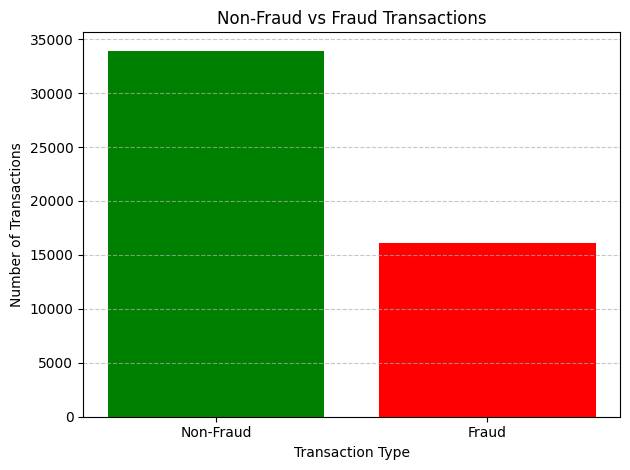

In [ ]:
# Counting non-fraud and fraud transactions
fraud_counting = data['Fraud_Label'].value_counts().sort_index()

# Plotting the graph
plt.bar(['Non-Fraud', 'Fraud'], fraud_counting, color = ['green' , 'red'])
plt.title('Non-Fraud vs Fraud Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Transactions')
plt.grid(axis = 'y', linestyle='--', alpha = 0.7)
plt.tight_layout()
plt.show()

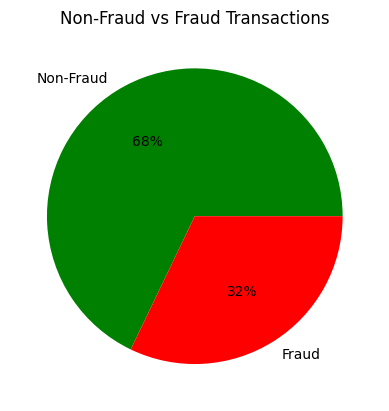

In [ ]:
plt.pie(data.Fraud_Label.value_counts(),labels = ['Non-Fraud', 'Fraud'], autopct = '%.f%%', colors = ['green', 'red'])
plt.title('Non-Fraud vs Fraud Transactions')
plt.show()

### Fraud Transactions Features

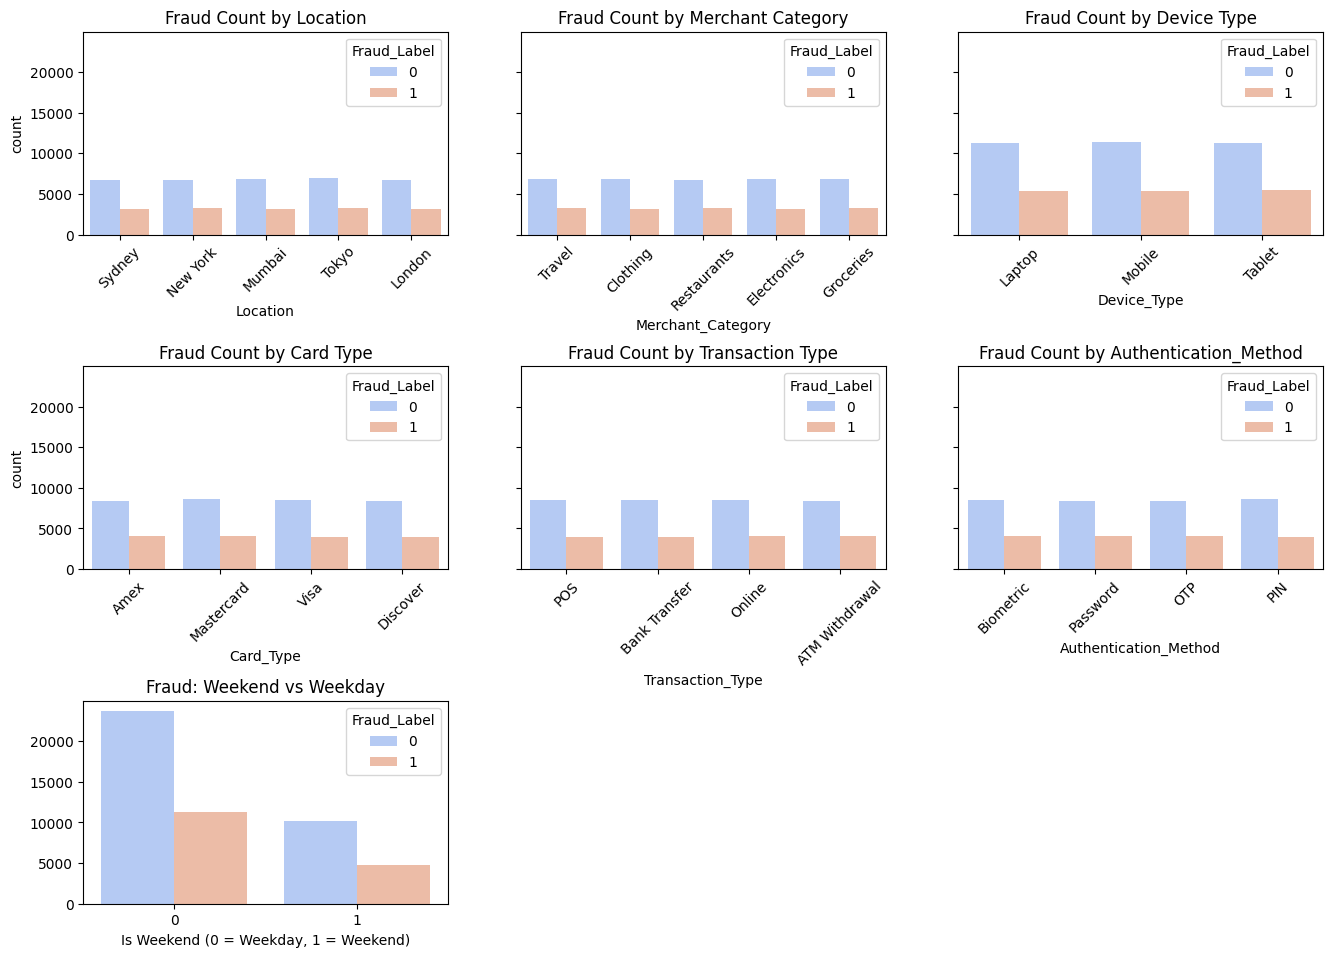

In [ ]:
fig, axes = plt.subplots(3, 3, figsize = (16,8), sharey = True, constrained_layout = False)
axs = axes.ravel ()

sns.countplot(ax = axs [0], x = 'Location', hue = 'Fraud_Label', data = data, palette = 'coolwarm')
axs[0].set_title("Fraud Count by Location")
axs[0].tick_params(axis ='x', rotation = 45)

sns.countplot(ax = axs[1], x = 'Merchant_Category', hue = 'Fraud_Label', data = data, palette = 'coolwarm')
axs[1].set_title("Fraud Count by Merchant Category")
axs[1].tick_params(axis = 'x', rotation = 45)

sns.countplot(ax = axs[2], x = 'Device_Type', hue = 'Fraud_Label', data = data, palette = 'coolwarm')
axs[2].set_title("Fraud Count by Device Type")
axs[2].tick_params(axis = 'x', rotation = 45)

sns.countplot(ax = axs[3], x = 'Card_Type', hue = 'Fraud_Label', data = data, palette = 'coolwarm')
axs[3].set_title("Fraud Count by Card Type")
axs[3].tick_params(axis = 'x', rotation = 45)

sns.countplot(ax = axs[4], x = 'Transaction_Type', hue = 'Fraud_Label', data = data, palette = 'coolwarm')
axs[4].set_title("Fraud Count by Transaction Type")
axs[4].tick_params(axis = 'x', rotation = 45)

sns.countplot(ax = axs[5], x = 'Authentication_Method', hue = 'Fraud_Label', data = data, palette = 'coolwarm')
axs[5].set_title("Fraud Count by Authentication_Method")
axs[5].tick_params(axis = 'x', rotation = 45)

sns.countplot(ax = axs[6], x = 'Is_Weekend', hue = 'Fraud_Label', data = data, palette = 'coolwarm')
axs[6].set_title("Fraud: Weekend vs Weekday")
axs[6].set_xlabel("Is Weekend (0 = Weekday, 1 = Weekend)")
axs[6].set_ylabel("")

for ax in axs[7:]:
    ax.remove()
plt.subplots_adjust(wspace = 0.2, hspace = 0.65, top = 1.2)
plt.show()

In [ ]:
# Step 1 - Data Cleaning

# Check for null/missing values
data.isnull().sum()

,0
Transaction_ID,0
User_ID,0
Transaction_Amount,0
Transaction_Type,0
Timestamp,0
Account_Balance,0
Device_Type,0
Location,0
Merchant_Category,0
IP_Address_Flag,0


In [ ]:
# Converting 'Timestamp' to datetime
data ['Timestamp'] = pd.to_datetime (data['Timestamp'])
data ['Timestamp']

,Timestamp
0,2023-08-14 19:30:00
1,2023-06-07 04:01:00
2,2023-06-20 15:25:00
3,2023-12-07 00:31:00
4,2023-11-11 23:44:00
...,...
49995,2023-01-29 18:38:00
49996,2023-05-09 08:55:00
49997,2023-01-30 19:32:00
49998,2023-03-09 19:47:00


In [ ]:
# Step 2 - Data Preprocessing
data = data.drop(columns = ['Transaction_ID', 'User_ID', 'Timestamp', 'Risk_Score', 'Previous_Fraudulent_Activity'], errors = 'ignore')
data

,Transaction_Amount,Transaction_Type,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Is_Weekend,Fraud_Label
0,39.79,POS,93213.17,Laptop,Sydney,Travel,0,7,437.63,3,Amex,65,883.17,Biometric,0,0
1,1.19,Bank Transfer,75725.25,Mobile,New York,Clothing,0,13,478.76,4,Mastercard,186,2203.36,Password,0,1
2,28.96,Online,1588.96,Tablet,Mumbai,Restaurants,0,14,50.01,4,Visa,226,1909.29,Biometric,0,1
3,254.32,ATM Withdrawal,76807.20,Tablet,New York,Clothing,0,8,182.48,4,Visa,76,1311.86,OTP,0,1
4,31.28,POS,92354.66,Mobile,Mumbai,Electronics,0,14,328.69,4,Mastercard,140,966.98,Password,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,45.05,Online,76960.11,Mobile,Tokyo,Clothing,0,2,389.00,3,Amex,98,1537.54,PIN,1,0
49996,126.15,POS,28791.75,Mobile,Tokyo,Clothing,0,13,434.95,4,Visa,93,2555.72,Biometric,0,1
49997,72.02,Online,29916.41,Laptop,Mumbai,Clothing,0,1,369.15,2,Visa,114,4686.59,Biometric,0,0
49998,64.89,Bank Transfer,67895.67,Mobile,Tokyo,Electronics,0,13,242.29,4,Discover,72,4886.92,Biometric,0,1


In [ ]:
# Step 2 - Data Preprocessing

# Encode categorical variables using Label Encoding for simplicity
label_encoders = {}
categorical_columns = data.select_dtypes(include=['object']).columns

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Scale numerical features
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns.drop('Fraud_Label')
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [ ]:
categorical_columns = ['Transaction_Type', 'Device_Type', 'Location', 'Merchant_Category', 'Card_Type', 'Authentication_Method']
data_encoded_categ = pd.get_dummies (data, columns = categorical_columns, drop_first = True) # converting categorical features into dummy variables
data_encoded_categ

,Transaction_Amount,Account_Balance,IP_Address_Flag,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Age,Transaction_Distance,Is_Weekend,Fraud_Label,...,Merchant_Category_-0.7064250075416338,Merchant_Category_0.00024026619306980414,Merchant_Category_0.7069055399277734,Merchant_Category_1.413570813662477,Card_Type_-0.45442568530608535,Card_Type_0.44032442358988466,Card_Type_1.3350745324858546,Authentication_Method_-0.4452445109141687,Authentication_Method_0.44849773268085447,Authentication_Method_1.3422399762758777
0,-0.604147,1.492310,-0.229898,-0.120121,1.289836,0.704581,-0.797272,-1.120662,-0.654093,0,...,False,False,False,True,False,False,False,False,False,False
1,-0.995285,0.884250,-0.229898,1.365176,1.580752,1.411665,0.956729,-0.205135,-0.654093,1,...,False,False,False,False,False,True,False,False,False,True
2,-0.713888,-1.693492,-0.229898,1.612725,-1.451837,1.411665,1.536564,-0.409067,-0.654093,1,...,False,False,True,False,False,False,True,False,False,False
3,1.569711,0.921870,-0.229898,0.127429,-0.514864,1.411665,-0.637818,-0.823374,-0.654093,1,...,False,False,False,False,False,False,True,True,False,False
4,-0.690380,1.462460,-0.229898,1.612725,0.519293,1.411665,0.289918,-1.062541,1.528836,1,...,True,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,-0.550847,0.927187,-0.229898,-1.357868,0.945871,0.704581,-0.318908,-0.666869,1.528836,0,...,False,False,False,False,False,False,False,False,True,False
49996,0.270949,-0.747642,-0.229898,1.365176,1.270880,1.411665,-0.391388,0.039220,-0.654093,1,...,False,False,False,False,False,False,True,False,False,False
49997,-0.277556,-0.708537,-0.229898,-1.605418,0.805470,-0.002503,-0.086974,1.516939,-0.654093,0,...,False,False,False,False,False,False,True,False,False,False
49998,-0.349805,0.612013,-0.229898,1.365176,-0.091822,1.411665,-0.695801,1.655865,-0.654093,1,...,True,False,False,False,True,False,False,False,False,False


In [ ]:
# Defining the features (X) and target variable (y)
X = data.drop(columns = ["Fraud_Label"])  # Independent variables
y = data["Fraud_Label"]  # Target variable

from sklearn.model_selection import train_test_split

# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state = 42)

# Scale numerical features after splitting
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Check the size of the datasets
X_train.shape

(40000, 15)

In [ ]:
# Check the size of the datasets
X_test.shape

(10000, 15)

## Semi-Supervised Models

### Self Training - Logistic Regression

In [ ]:
# Scaling the training data and transforming test
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Converting y_train to NumPy array to avoid indexing errors
y_train_array = y_train.to_numpy()

In [ ]:
# Creating the semi-supervised labels (label 5% of training data)
n_labeled = int(0.05 * len(X_train_scaled))

In [ ]:
# Finding cases of fraud and non-fraud
fraud_cases = np.where(y_train_array == 1)[0]
nonfraud_cases = np.where(y_train_array == 0)[0]

In [ ]:
# Random selection of equal number from each class
np.random.seed(42)
fraud_labeled = np.random.choice(fraud_cases, n_labeled // 2, replace = False)
nonfraud_labeled = np.random.choice(nonfraud_cases, n_labeled // 2, replace = False)

In [ ]:
# Setting all labels to -1 initially (unlabeled)
y_semi = np.full_like(y_train_array, -1)
y_semi[fraud_labeled] = y_train_array[fraud_labeled]
y_semi[nonfraud_labeled] = y_train_array[nonfraud_labeled]

In [ ]:
# Base Classifier - this is a supervised model
# Self-training wrapper - uses the base classifier to do the semi-supervised learning
base_lr = LogisticRegression(max_iter = 2000, class_weight = 'balanced', solver = 'lbfgs')

In [ ]:
# Fitting the Self Training (LR) Classifier
stlr_model = SelfTrainingClassifier(
    base_estimator = base_lr,
    threshold = 0.98,   # strict confidence for adding pseudo-labels; tuning can be done between 0.95–0.99
    max_iter = 10,
    verbose = True
)
# Fitting and Predicting the model
stlr_model.fit(X_train_scaled, y_semi) # uses y = -1 as unlabeled
y_pred_stlr = stlr_model.predict(X_test_scaled)

# Evaluating the model
print("The Self-Training (LR) Classification Report:")
print("Accuracy:", accuracy_score(y_test, y_pred_stlr))
print(classification_report(y_test, y_pred_stlr))

The Self-Training (LR) Classification Report:
Accuracy: 0.7233
              precision    recall  f1-score   support

           0       0.85      0.72      0.78      6787
           1       0.55      0.72      0.63      3213

    accuracy                           0.72     10000
   macro avg       0.70      0.72      0.70     10000
weighted avg       0.75      0.72      0.73     10000



/usr/local/lib/python3.12/dist-packages/sklearn/semi_supervised/_self_training.py:210: FutureWarning: `base_estimator` has been deprecated in 1.6 and will be removed in 1.8. Please use `estimator` instead.
  warn(


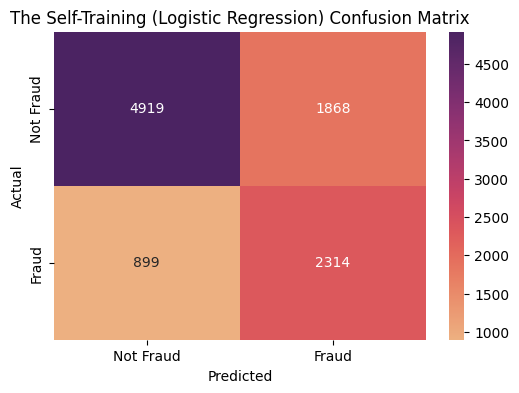

In [ ]:
# Plotting the Self Training LR confusion matrix
y_pred_stlr = stlr_model.predict(X_test_scaled)
cm_stlr = confusion_matrix(y_test, y_pred_stlr)
plt.figure(figsize = (6,4))
sns.heatmap(cm_stlr, annot = True, fmt = 'd', cmap = 'flare', xticklabels = ['Not Fraud','Fraud'], yticklabels = ['Not Fraud','Fraud'])
plt.title("The Self-Training (Logistic Regression) Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Self Training - XGBoost

In [ ]:
labeled_mask = (y_semi != -1) # y_semi: labeled rows are 0 or 1, unlabeled are -1
y_seed = y_semi[labeled_mask] # the mask is used to extract the labeled values
n_pos = np.sum(y_seed == 1) # counts the amount of fraud samples
n_neg = np.sum(y_seed == 0) # counts the amount of non fraud samples
scale_pos_weight = (n_neg / max(n_pos, 1)) # it deals with imbalance ratio where the amount of negatives/amount of positives

In [ ]:
# Fitting the Self Training (XGB) Classifier

base_xgb = XGBClassifier(
    n_estimators = 500,
    max_depth = 6,
    learning_rate = 0.05,
    subsample = 0.8, # row subsample, to reduce overfiting and add randomness
    colsample_bytree = 0.8, # feature subsample, to reduce overfitting
    scale_pos_weight = scale_pos_weight,  # to handle the imbalance
    objective = 'binary:logistic', # a binary classification with an output of probability
    eval_metric = 'logloss',
    tree_method = "hist" # for a quicker histogram
)

# Fitting and Predicting the model
stxgb_model = SelfTrainingClassifier(
    base_estimator = base_xgb,
    threshold = 0.99,
    max_iter = 10,
    verbose = True
)

In [ ]:
# Fitting and Predicting the model
stxgb_model.fit(X_train_scaled, y_semi) # uses y = -1 as unlabeled
y_pred_xgb = stxgb_model.predict(X_test_scaled)

# Evaluating the model
print("The Self-Training (XGBoost) Classification Report:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

/usr/local/lib/python3.12/dist-packages/sklearn/semi_supervised/_self_training.py:210: FutureWarning: `base_estimator` has been deprecated in 1.6 and will be removed in 1.8. Please use `estimator` instead.
  warn(


End of iteration 1, added 7503 new labels.
End of iteration 2, added 318 new labels.
End of iteration 3, added 409 new labels.
End of iteration 4, added 557 new labels.
End of iteration 5, added 732 new labels.
End of iteration 6, added 860 new labels.
End of iteration 7, added 972 new labels.
End of iteration 8, added 832 new labels.
End of iteration 9, added 876 new labels.
End of iteration 10, added 728 new labels.
The Self-Training (XGBoost) Classification Report:
Accuracy: 0.826
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      6787
           1       0.77      0.66      0.71      3213

    accuracy                           0.83     10000
   macro avg       0.81      0.78      0.79     10000
weighted avg       0.82      0.83      0.82     10000



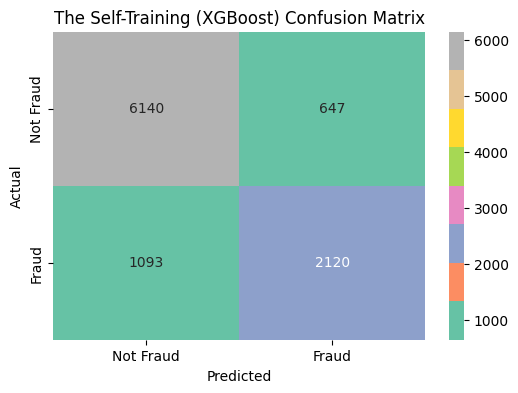

In [ ]:
# Plotting the Self Training (XGB) confusion matrix
y_pred_xgb = stxgb_model.predict(X_test_scaled)
cm_stxgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize = (6,4))
sns.heatmap(cm_stxgb, annot = True, fmt = 'd', cmap = 'Set2', xticklabels = ['Not Fraud','Fraud'], yticklabels = ['Not Fraud','Fraud'])
plt.title("The Self-Training (XGBoost) Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Deep Autoencoders

In [ ]:
# Training only on non-fraud (y == 0)
X_train_normal = X_train[y_train == 0]

In [ ]:
# Building the Autoencoder
input_dim = X_train.shape[1]

input_layer = Input(shape=(input_dim,))
encoded = Dense(16, activation = 'relu')(input_layer) # the 1st hidden layer has 16 neurons, relu activation
encoded = Dense(8, activation = 'relu')(encoded) # the 2nd hidden layer has 8 neuros, reul activation. it encodes the input to a smaller representation
decoded = Dense(16, activation = 'relu')(encoded) # take an 8 dimensional encoding to expand it back, 1st decoder layer has 16 neurons and relu activation
output_layer = Dense(input_dim, activation = 'linear')(decoded) # the size is the same as the input with linear activation. it reconstructs the original input through compressing representation

autoencoder_model = Model(inputs = input_layer, outputs = output_layer) # create a Keras model to map an input leading to reconstruction, after training the model learn to reproduce the input where the output is
autoencoder_model.compile(optimizer = Adam(learning_rate = 1e-3), loss = 'mse') # the lower the loss the better the reconstruction. it measures the closeness of the reconstructed output with the original input

In [ ]:
w_norm  = 1.0 # non fraud
w_fraud = 0.1   # weight for fraud samples. could be between 0.0–0.3 (smaller autoecoder ignores anomalies more while larger ones matter relatively more in training)

sample_w = np.where(y_train == 1, w_fraud, w_norm).astype("float32") # the array of one weight per training sample

In [ ]:
# Training the model
history = autoencoder_model.fit(
    X_train_normal, X_train_normal,
    sample_weight = sample_w,
    epochs = 50,
    batch_size = 32,
    shuffle = True,
    validation_split = 0.1,
    verbose = 1
)

Epoch 1/50
764/764 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.6455 - val_loss: 0.4082
Epoch 2/50
764/764 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 0.3902 - val_loss: 0.3194
Epoch 3/50
764/764 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.3063 - val_loss: 0.2842
Epoch 4/50
764/764 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2813 - val_loss: 0.2737
Epoch 5/50
764/764 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2738 - val_loss: 0.2702
Epoch 6/50
764/764 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2691 - val_loss: 0.2678
Epoch 7/50
764/764 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2692 - val_loss: 0.2667
Epoch 8/50
764/764 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2724 - val_loss: 0.2667
Epoch 9/50
764/764 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2691 - val_loss: 0.2652
Epoch 10/50
764/764 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2688 - val_loss: 0.2654
Epoch 11/50
764/764 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2698 - val_loss: 0.2651
Epoch 12/50
764/764 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step

In [ ]:
# Reconstruction error on test set
X_test_pred = autoencoder_model.predict(X_test)
reconstruction_error = np.mean(np.power(X_test - X_test_pred, 2), axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
# Setting the threshold to 95th percentile
threshold = np.percentile(reconstruction_error, 95)

In [ ]:
# Predicting fraud (1 = fraud, 0 = normal/non-fraud)
y_predauto = (reconstruction_error > threshold).astype(int)

In [ ]:
# Evaluating the model

print(" The Deep Autoencoder Classification Report:")
print("Accuracy:", accuracy_score(y_test, y_predauto))
print(classification_report(y_test, y_predauto))

 The Deep Autoencoder Classification Report:
Accuracy: 0.6791
              precision    recall  f1-score   support

           0       0.69      0.96      0.80      6787
           1       0.50      0.08      0.14      3213

    accuracy                           0.68     10000
   macro avg       0.60      0.52      0.47     10000
weighted avg       0.63      0.68      0.59     10000



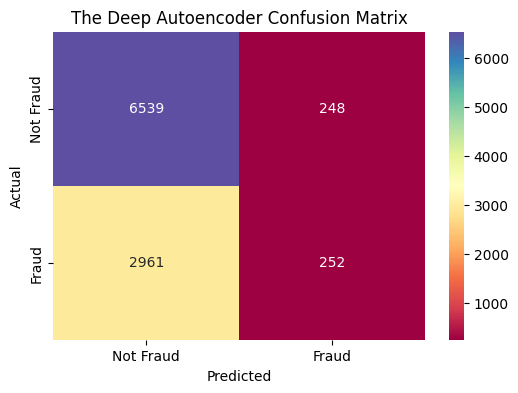

In [ ]:
# Plotting the Deep Autoencoders confusion matrix
cm_deepauto = confusion_matrix(y_test, y_predauto)
plt.figure(figsize = (6,4))
sns.heatmap(cm_deepauto, annot = True, fmt ='d', cmap = 'Spectral', xticklabels = ['Not Fraud', 'Fraud'], yticklabels = ['Not Fraud', 'Fraud'])
plt.title("The Deep Autoencoder Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

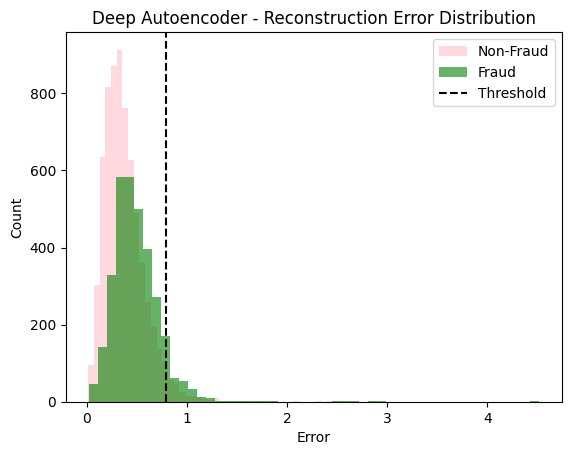

In [ ]:
# Plotting the Deep Autoencoder Reconstruction Error Distribution

plt.hist(reconstruction_error[y_test == 0], color = 'pink', bins = 50, alpha = 0.6, label = "Non-Fraud")
plt.hist(reconstruction_error[y_test == 1], color = 'green', bins = 50, alpha = 0.6, label = "Fraud")
plt.axvline(threshold, color = 'black', linestyle = '--', label = "Threshold")
plt.title("Deep Autoencoder - Reconstruction Error Distribution")
plt.xlabel("Error")
plt.ylabel("Count")
plt.legend()
plt.show()

### Deep Autoencoder - Model Loss Curve

Text(0.5, 1.0, 'Deep Autoencoder - Training Loss and Validation Loss')

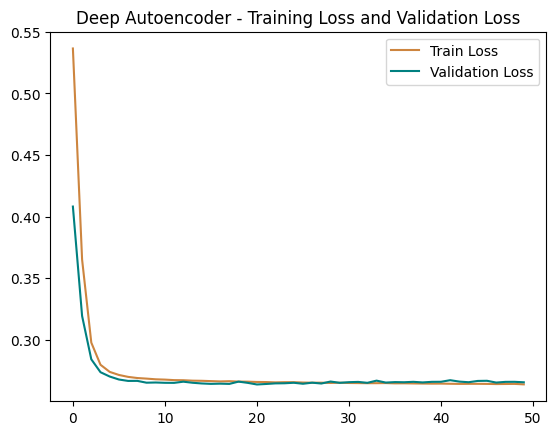

In [ ]:
# Plotting training and validation loss over epochs
plt.plot(history.history['loss'], color = 'peru', label = 'Train Loss')
plt.plot(history.history['val_loss'], color = 'teal', label = 'Validation Loss')
plt.legend()
plt.title('Deep Autoencoder - Training Loss and Validation Loss')

### Semi - Supervised Learning Models -  Area Under the Curve (AUC) Receiver Operating Characteristic (ROC) Curve

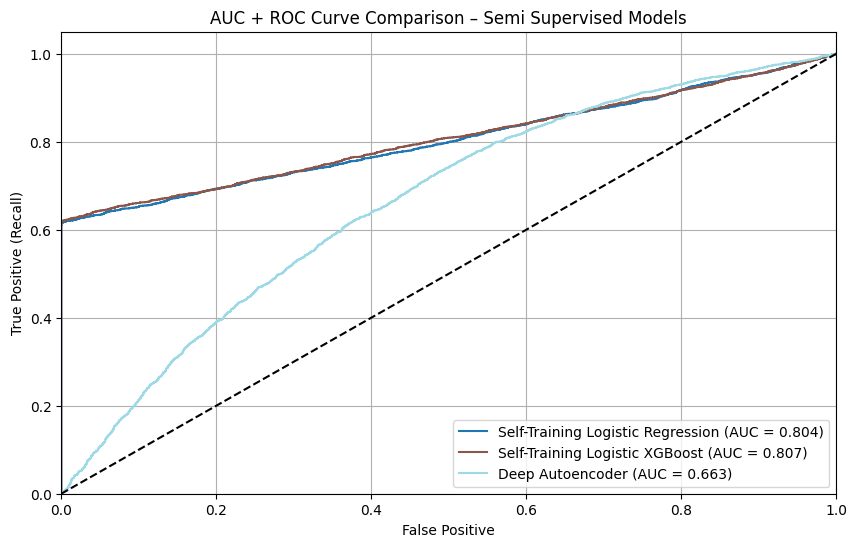

In [ ]:
models_curve = {
"Self-Training Logistic Regression": stlr_model.predict_proba(X_test_scaled)[:, 1],
"Self-Training Logistic XGBoost": stxgb_model.predict_proba(X_test_scaled)[:, 1],
"Deep Autoencoder": reconstruction_error,
}

colours = plt.cm.tab20(np.linspace(0, 1, len(models_curve)))

# Plotting ROC for each model
plt.figure (figsize = (10, 6))
for i, (name, y_scores) in enumerate (models_curve.items()):
    fpr, tpr, _ = roc_curve (y_test, y_scores)
    roc_auc = auc (fpr, tpr)
    plt.plot (fpr, tpr, label = f"{name} (AUC = {roc_auc:.3f})", color = colours[i]) # AUC - area under curve

plt.plot([0, 1], [0, 1], "k--")  # the diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive")
plt.ylabel("True Positive (Recall)")
plt.title("AUC + ROC Curve Comparison – Semi Supervised Models")
plt.legend(loc = "lower right")
plt.grid(True)
plt.show()

### Semi - Supervised Learning Models Comparison - Accuracy and F1 Score

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd

def to_labels(y_true, preds, pos_label=1):
    y_true = np.asarray(y_true).ravel()
    preds = np.asarray(preds)


# If probs with shape (n,2) take column 1
    if preds.ndim == 2 and preds.shape[1] == 2: # return the probabilities through predict_proba(X) with shape (n_samples, 2) for binary tasks: column 0 = P(class 0), column 1 = P(class 1)
        preds = preds[:, 1] # if preds has a 2-column matrix, then it is seen as probabilities and keeps the positive class (label 1) = column 1 and the results become 1D array
    preds = preds.ravel()

# Checking if metrics have the same number of true labels and predictions
    if len(preds) != len(y_true):
        return None, None, f"length mismatch (y_true={len(y_true)}, preds={len(preds)})"

# Checking to see if there are two unique values
    uniq = np.unique(preds[~np.isnan(preds)]) # where preds has NaN values and it picks only non NaN predicitions
    is_binary = uniq.size <= 2 and np.all(np.isin(uniq, [0, 1])) # two unique values at most

    if is_binary:
        return preds.astype(int), None, "labels"  # true if prediction are only binary and the returned predicitons are class labels (0,1)

# the preds are not labells but they are scores: the higher the score the more likely it is to be positive
    prec, rec, thr = precision_recall_curve(y_true, preds, pos_label = pos_label) # assumes higher scores mean positive class
    f1s = (2 * prec * rec) / (prec + rec + 1e-9) # 1e-9 avoids being diveded by. 0
    if thr.size == 0:  # if the predictions are the same, then the precision_recall_curve will return no thresholds
        cutoff = float(np.median(preds))
    else:
        cutoff = thr[np.nanargmax(f1s)] # np.nanargmax (f1): returns maximum F1 while ignoring NaNs
    labels = (preds >= cutoff).astype(int) #thr: the threshold with the best F1
    return labels, preds, f"threshold={cutoff:.4f}" #cutoff: decision to use for the classification

# Model predictions dictionary
semisupervisedmodels = {
    "Self-Training Logistic Regression": y_pred_stlr,
    "Self-Training XGBoost": y_pred_xgb,
    "Deep Autoencoder": y_predauto,
}

# Collecting the accuracy and F1 score
results = []
for model_name, y_pred in semisupervisedmodels.items():
    if y_pred is None:
        continue

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        "Model": model_name,
        "F1 Score": f1,
        "Accuracy": accuracy,

    })

# Creating the table
semisupervisedcomparison_table = pd.DataFrame(results)
semisupervisedcomparison_table.sort_values(by = "F1 Score", ascending = False, inplace = True)


# Displaying the table
semisupervisedcomparison_table

,Model,F1 Score,Accuracy
1,Self-Training XGBoost,0.709030,0.8260
0,Self-Training Logistic Regression,0.625828,0.7233
2,Deep Autoencoder,0.135739,0.6791


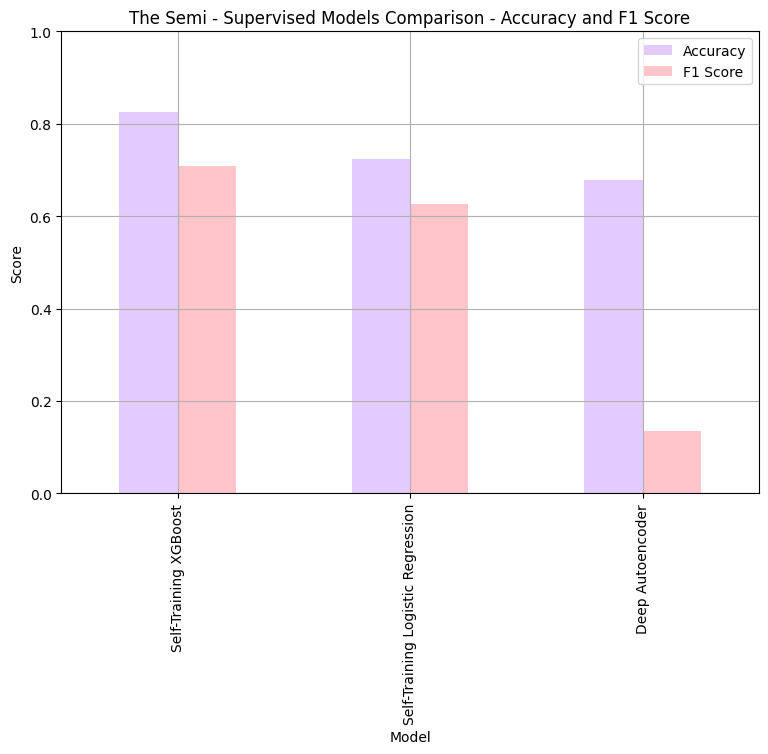

In [ ]:
# Plotting the Accuracy and F1 Score

colors1 = ['#e4cbff', '#ffc5cb']
semisupervisedcomparison_table.set_index('Model')[["Accuracy", "F1 Score"]].plot(kind = 'bar' , figsize = (9,6), color = colors1)
plt.title("The Semi - Supervised Models Comparison - Accuracy and F1 Score")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

### Semi - Supervised Learning Models Comparison - Specificity and Sensitivity

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

# Defining the function
def get_sensitivity_specificity(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return sensitivity, specificity

# Predictions for each model
semiupervisedmodels = {
    "Self-Training Logistic Regression": y_pred_stlr,
    "Self-Training Logistic XGBoost": y_pred_xgb,
    "Deep Autoencoder": y_predauto,
}

# Applying the function to each model and store the results
results = []
for model_name, y_pred in semisupervisedmodels.items():
    sensitivity, specificity = get_sensitivity_specificity(y_test, y_pred)
    results.append({
        "Model": model_name,
        "Sensitivity (Recall)": sensitivity,
        "Specificity": specificity
    })

# Creating a summary DataFrame
import pandas as pd
semisupervised_sens_spec = pd.DataFrame(results)
semisupervised_sens_spec.sort_values(by = "Sensitivity (Recall)", ascending = False, inplace = True)

# Displaying the table
semisupervised_sens_spec

,Model,Sensitivity (Recall),Specificity
0,Self-Training Logistic Regression,0.720199,0.724768
1,Self-Training XGBoost,0.659819,0.904671
2,Deep Autoencoder,0.078431,0.963460


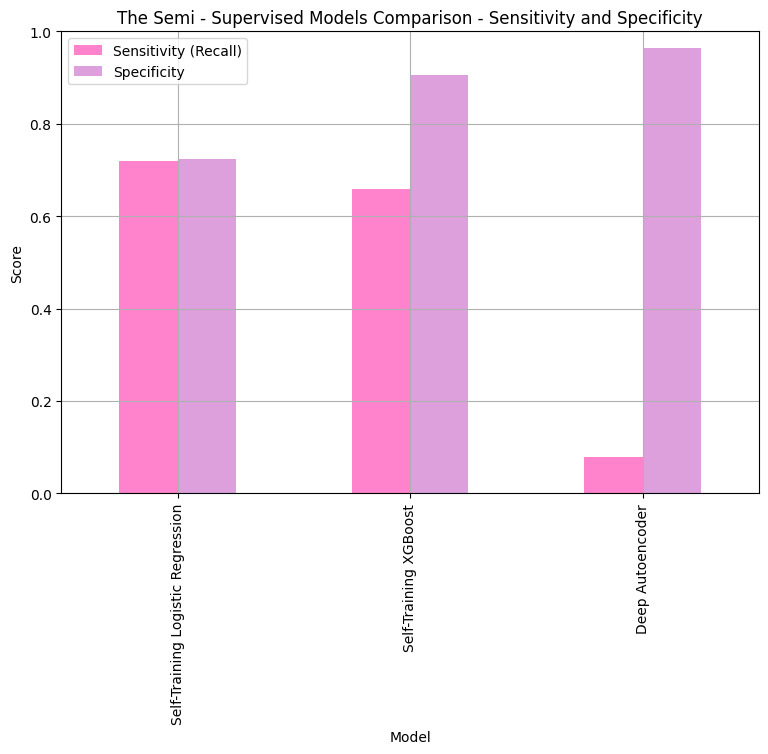

In [ ]:
# Plotting the Sensitivity and Specificity
colors2 = ['#fe83cc', 'plum']
semisupervised_sens_spec.set_index('Model')[["Sensitivity (Recall)", "Specificity"]].plot(kind = 'bar' , figsize = (9,6), color = colors2)
plt.title("The Semi - Supervised Models Comparison - Sensitivity and Specificity")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

### Semi-Supervised Learning Models Comparison - Precision Recall Curve

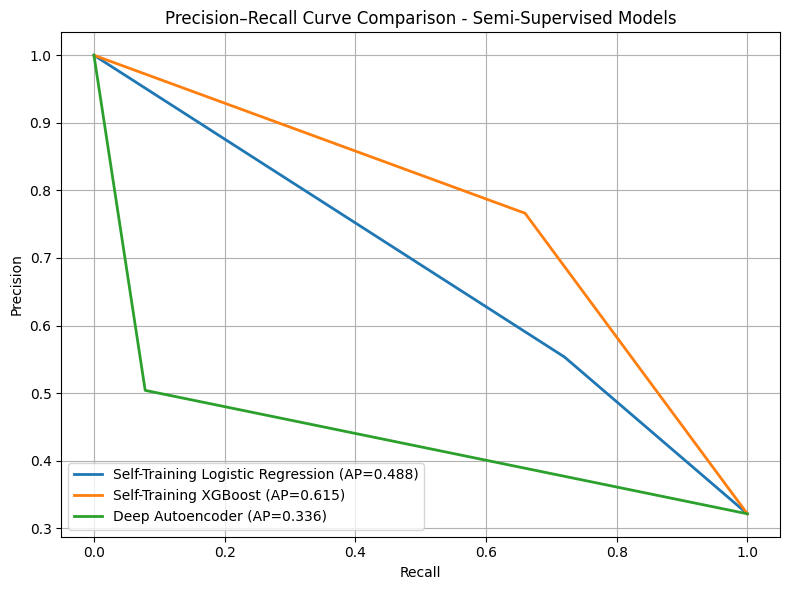

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

preds = {
    "Self-Training Logistic Regression": y_pred_stlr,
    "Self-Training XGBoost": y_pred_xgb,
    "Deep Autoencoder": y_predauto
}

def as_scores(y_true, p):
    """Return a 1D score vector. If binary labels passed, use them as scores."""
    p = np.asarray(p)
    if p.ndim == 2 and p.shape[1] == 2:   # predict_proba style
        p = p[:, 1]
    p = p.ravel()
    if len(p) != len(y_true):
        raise ValueError(f"len mismatch (y_true={len(y_true)}, preds={len(p)})")
    # if {0,1} labels
    u = np.unique(p[~np.isnan(p)])
    if u.size <= 2 and np.all(np.isin(u, [0, 1])):
        p = p.astype(float)
    return p

fig, ax = plt.subplots(figsize=(8, 6))

curves = []
for name, yhat in preds.items():
    if yhat is None:
        continue
    try:
        scores = as_scores(y_test, yhat)
        precision, recall, _ = precision_recall_curve(y_test, scores, pos_label=1)
        ap = average_precision_score(y_test, scores)
        line, = ax.plot(recall, precision, lw=2, label=f"{name} (AP={ap:.3f})")
        curves.append((ap, line))
    except Exception as e:
        print(f"Skipped {name}: {e}")

ax.set_xlabel("Recall")
ax.set_ylabel("Precision")
ax.set_title("Precision–Recall Curve Comparison - Semi-Supervised Models")
ax.grid(True)

# Sorting legend by AP (highest first)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc = "lower left")
plt.tight_layout()
plt.show()

### Ivanise Duarte - SID 2367362